In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json
import seaborn as sns
import scipy.stats as st

from scipy.stats import linregress

# Import API key
# from config import g_key

In [2]:
# Files to Load (Remember to Change These)
fast_food_restaurants_2018 = "../Resources/Fast_Food_Restaurants_2018.csv"
census1_2018 ="../Resources/census_data_clean_2018.csv"
# Read files into Pandas DF
Rest_2018 = pd.read_csv(fast_food_restaurants_2018)
census2_2018=pd.read_csv(census1_2018)

In [3]:
# remove columns we will not need
Rest_2018=Rest_2018.drop(['id','sourceURLs','websites'], axis =1)
Rest_2018.columns

Index(['dateAdded', 'dateUpdated', 'address', 'categories', 'city', 'country',
       'keys', 'latitude', 'longitude', 'name', 'postalCode', 'province'],
      dtype='object')

In [4]:
# reorganize/rename columns
Rest_2018 = Rest_2018.rename(columns={'name':'Name', 'address': 'Address', 'city': 'City', 'country': 'Country', 'latitude': 'Latitude', 'longitude':'Longitude', 'postalCode': 'Zip Code',\
                                     'province': 'State'})
Rest_2018 = Rest_2018[['Name', 'Address', 'City','State', 'Zip Code','Country', 'Latitude', 'Longitude']]
Rest_2018.head()

,Name,Address,City,State,Zip Code,Country,Latitude,Longitude
0,SONIC Drive In,800 N Canal Blvd,Thibodaux,LA,70301,US,29.814697,-90.814742
1,SONIC Drive In,800 N Canal Blvd,Thibodaux,LA,70301,US,29.814697,-90.814742
2,Taco Bell,206 Wears Valley Rd,Pigeon Forge,TN,37863,US,35.803788,-83.580553
3,Arby's,3652 Parkway,Pigeon Forge,TN,37863,US,35.782339,-83.551408
4,Steak 'n Shake,2118 Mt Zion Parkway,Morrow,GA,30260,US,33.562738,-84.321143


In [5]:
# get unique names in list and sort alphabetically to assist with cleaning
names = Rest_2018['Name'].unique()
names.sort()
print(len(names))
print(names)

571
['7-Eleven' '90 Miles Cuban Cafe' 'A&W/Long John Silvers'
 "A's Ace Burgers" 'Abruzzi Pizza' 'Acropolis Gyro Palace'
 'Adobe Cantina Salsa' 'Ak Buffet' 'All About Burger'
 'Ameci Pizza & Pasta' "Andy's Frozen Custard" "Angelina's Pizza"
 "Ani's Chicken" "Arby's" "Arby's - Closed" 'Arbys' 'Arctic Circle'
 "Arni's Crawfordsville" "Arthur Treacher's Fish & Chips" 'Au Bon Pain'
 "Auntie Anne's" "Auntie Anne's Pretzels" 'Ay Jalisco' 'B Good'
 'B&D Burgers' "B's Pizza" 'B.GOOD' 'BURGERFI' 'Back Yard Burgers'
 'Backyard Grill' "Bad Daddy's Burger Bar" 'Baja Fresh Mexican Grill'
 "Baker's Drive Thru" "Baker's Drive-thru" 'Band Box Diner' 'Barberitos'
 "Barro's Pizza" 'Baskin-Robbins' 'Batter Up' 'BeanThru' 'Beef Villa'
 "Bell's Pizza" 'Belleria Pizzeria' "Ben & Jerry's" "Ben and Jerry's"
 "Bennidito's Pizza" 'Best Gyros' 'Big House Burgers' 'Big Island Pizza'
 'Bistro To Go' 'Blackies Hotdog Stand' 'Blackjack Pizza'
 "Blake's Lotaburger" 'Blimpie' 'Blue Coast Burrito' 'Boardwalk Grill'
 'B

In [6]:
Rest_2018['Name'] = Rest_2018['Name'].replace({"Arby's - Closed":"Arby's",'Arbys': "Arby's", "Auntie Anne's": "Auntie Anne's Pretzels","Baker's Drive Thru":"Baker's Drive-thru","Ben and Jerry's": "Ben & Jerry's",'Bob Evans Restaurant':'Bob Evans',"Bojangles' Famous Chicken 'n Biscuits": 'Bojangles', 'Burger King¬Æ': 'Burger King','Capri Italian Restaurant':'Capri Restaurant',"Carl's Jr.":"Carl's Jr","Carl's Jr. / Green Burrito":"Carl's Jr","Carl's Jr / Green Burrito":"Carl's Jr",'Caseys Carry Out Pizza':"Casey's General Store","Charley's Grilled Subs":'Charleys Philly Steaks',"Checker's Pizza":'Checkers','Chick-fil-A':'Chick-Fil-A', 'Chipotle':'Chipotle Mexican Grill','Dairy Queen (Treat Only)':'Dairy Queen','Dunkin Donuts':"Dunkin' Donuts",'Five Guys Burgers Fries':'Five Guys', 'Five Guys Burgers And Fries':'Five Guys',"Foster's Freeze":'Fosters Freeze', "Hardee's":'Hardees',"Hardee's / Red Burrito":'Hardees', "Hardee's/red Burrito":'Hardees','Jack in the Box':'Jack In The Box', 'Jack in the Box -':'Jack In The Box'})
Rest_2018['Name'] = Rest_2018['Name'].replace({"Jimmy John's":'Jimmy Johns','KFC - Kentucky Fried Chicken':'KFC','KFC/AW':'KFC','KFC/Long John Silvers':'KFC', 'KFC/Taco Bell':'KFC'})
Rest_2018['Name'] = Rest_2018['Name'].replace({"Little Caesar's Pizza":'Little Caesars', 'Little Caesars Pizza':'Little Caesars',"Long John Silver's / AW" 'Long John Silvers':"Long John Silver's",'Long John Silvers / A&W':"Long John Silver's",'Mc Donalds':"McDonald's","McDonald's of Rolesville":"McDonald's",'McDonalds':"McDonald's","McDonalds's":"McDonald's","Mcdonald's":"McDonald's",'Mcdonalds':"McDonald's",'Mcdonalds Whitehouse':"McDonald's"})
Rest_2018['Name'] = Rest_2018['Name'].replace({'Panda Express Innovation Kitchen':'Panda Express' ,'PepperJax Grill':'Pepperjax Grill',"Popeye's Louisiana Kitchen":'Popeyes','Popeyes Chicken & Biscuits':'Popeyes','Popeyes Chicken Biscuits':'Popeyes','Popeyes Louisiana Kitchen':'Popeyes'})
Rest_2018['Name'] = Rest_2018['Name'].replace({'QDOBA Mexican Eats':'Qdoba Mexican Grill', 'Qdoba Mexican Eats':'Qdoba Mexican Grill', "Quizno's": 'Quiznos', 'Quiznos Sub':'Quiznos',"Raising Cane's":'Raising Canes', "Raising Cane's Chicken Fingers":'Raising Canes'})
Rest_2018['Name'] = Rest_2018['Name'].replace({"Rally's Hamburgers":"Rally's", 'Rallys':"Rally's",'Roma Pizza':'Romas Pizza','SONIC Drive In': 'SONIC Drive-In', 'SUBWAY¬Æ':'SUBWAY'})
Rest_2018['Name'] = Rest_2018['Name'].replace({'Sonic':'SONIC Drive-In', "Sonic America's Drive-In":'SONIC Drive-In','Sonic Drive In':'SONIC Drive-In','Sonic Drive in':'SONIC Drive-In','Sonic Drive-In':'SONIC Drive-In',"Steak 'n Shake":'Steak N Shake','Taco Bell / KFC':'Taco Bell' ,'Taco Bell/KFC':'Taco Bell','Taco Bell/Pizza Hut':'Taco Bell'})
Rest_2018['Name'] = Rest_2018['Name'].replace({ 'Wienerschitzel':'Wienerschnitzel','Wingstop Restaurant':'Wingstop',"Wolf's Dairy Queen" :'Dairy Queen',"Zaxby's Chicken Fingers & Buffalo Wings": "Zaxby's",'b.good':'B.GOOD', 'A&W/Long John Silvers':"Long John Silver's"})
# After going through team decided to rename Pizza Hut, Taco Bell and KFC to YUM Brands
Rest_2018['Name'] = Rest_2018['Name'].replace({'Pizza Hut': 'YUM Brands', 'KFC': 'YUM Brands','Taco Bell': 'YUM Brands'})

In [7]:
print(len(Rest_2018))


10000


In [8]:
# Remove locations that are not food related 'Walmart Supercenter''T-Mobile''Hilton Boston Logan Airport''7-Eleven'
# https://thispointer.com/python-pandas-how-to-drop-rows-in-dataframe-by-conditions-on-column-values/
indexNames= Rest_2018[(Rest_2018['Name']=='Walmart Supercenter')].index
Rest_2018.drop(indexNames, inplace=True)

In [9]:
indexNames= Rest_2018[(Rest_2018['Name']=='T-Mobile')].index
Rest_2018.drop(indexNames, inplace=True)

In [10]:
indexNames= Rest_2018[(Rest_2018['Name']=='Hilton Boston Logan Airport')].index
Rest_2018.drop(indexNames, inplace=True)

In [11]:
indexNames= Rest_2018[(Rest_2018['Name']=='7-Eleven')].index
Rest_2018.drop(indexNames, inplace=True)
print(len(Rest_2018))
Rest_2018['Name'].nunique()

9977


491

In [12]:
# find number of entries for each location
Rest_2018['Name'].value_counts()

McDonald's                   1953
YUM Brands                   1442
Burger King                   834
Subway                        776
Arby's                        669
                             ... 
The Extreme Pita                1
Cobani Gyro Kebab               1
Grande Italian Restaurant       1
Gyromania Grill                 1
Mickey's Gyros & Ribs           1
Name: Name, Length: 491, dtype: int64

In [13]:
# Remove all locations that have less than 50 entries
# https://www.thetopsites.net/article/58467286.shtml
threshold = 50
clean_rest_2018 = Rest_2018[Rest_2018.groupby('Name')['Name'].transform('count')>threshold].copy()
print(len(clean_rest_2018))
clean_rest_2018['Name'].value_counts()

8526


McDonald's         1953
YUM Brands         1442
Burger King         834
Subway              776
Arby's              669
Wendy's             628
Jack In The Box     332
Chick-Fil-A         228
Dairy Queen         220
Domino's Pizza      215
SONIC Drive-In      205
Carl's Jr           130
Jimmy Johns         121
Hardees             104
Krystal              82
Dunkin' Donuts       76
Panera Bread         76
SUBWAY               73
Culver's             71
Del Taco             66
Panda Express        62
Steak N Shake        56
In-N-Out Burger      54
Taco John's          53
Name: Name, dtype: int64

In [14]:
# export to csv as this is clean data incase anything happens while added in other informatoin
clean_rest_2018.to_csv('../Resources/clean_rest_2018.csv', encoding='utf-8', index = False)

In [15]:
# combine with chipotle csv
# first read get file then read into pandas DF
Chipotle_stores = "../Resources/chipotle_stores.csv"
chipotle = pd.read_csv(Chipotle_stores)
chipotle.head(2)
print(len(chipotle))

2629


In [16]:
clean_rest_2018.head(2)
print(len(clean_rest_2018))

8526


In [17]:
all_rest_df = pd.concat([chipotle, clean_rest_2018])
print(len(all_rest_df))
all_rest_df

11155


,Name,Address,City,State,Zip Code,Country,Latitude,Longitude
0,Chipotle Mexican Grill,346 W Magnolia Ave,Auburn,Alabama,36832,US,32.606813,-85.487328
1,Chipotle Mexican Grill,300 20th St S,Birmingham,Alabama,35233,US,33.509722,-86.802756
2,Chipotle Mexican Grill,3220 Morrow Rd,Birmingham,Alabama,35235,US,33.595581,-86.647437
3,Chipotle Mexican Grill,4719 Highway 280,Birmingham,Alabama,35242,US,33.422582,-86.698279
4,Chipotle Mexican Grill,1821 Cherokee Ave SW,Cullman,Alabama,35055,US,34.154134,-86.841220
...,...,...,...,...,...,...,...,...
9995,YUM Brands,3460 Robinhood Rd,Winston-Salem,NC,27106,US,36.117563,-80.316553
9996,YUM Brands,3069 Kernersville Rd,Winston-Salem,NC,27107,US,36.077718,-80.176748
9997,YUM Brands,838 S Main St,Kernersville,NC,27284,US,36.111015,-80.089165
9998,YUM Brands,1702 Glendale Dr SW,Wilson,NC,27893,US,35.719981,-77.945795


In [18]:
# Add census data to right of all rest data
census2_2018.head(2)

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,601,17242,40.5,13092,6999,10772,62.475351
1,602,38442,42.3,16358,9277,19611,51.014515


In [19]:
# Converted to string because restaurant data information was listed as string and could not merge properly
# Adjusted series name to allow proper merge as well
# Confirm number of zip codes with less than 5 digits
census2_2018['Zipcode'] = census2_2018['Zipcode'].astype(str)
census_2018 = census2_2018.rename(columns={'Zipcode': 'Zip Code'})
census_2018_badzip= census_2018[census_2018['Zip Code'].str.len()<5]
print(census_2018_badzip)

     Zip Code  Population  Median Age  Household Income  Per Capita Income  \
0         601       17242        40.5             13092               6999   
1         602       38442        42.3             16358               9277   
2         603       48814        41.1             16603              11307   
3         606        6437        43.3             12832               5943   
4         610       27073        42.1             19309              10220   
...       ...         ...         ...               ...                ...   
2519     8887        1004        44.7             89674              52151   
2520     8889        9562        50.1            135601              68475   
2521     8901       57659        22.8             42185              14928   
2522     8902       41135        37.0             94490              40046   
2523     8904       13992        35.2             80846              45349   

      Poverty Count  Poverty Rate  
0             10772     62.

In [20]:
#Research confirms that for the cities and states with zip codesless than 5 digits, the zip codes begin with 0.
#Excel truncates the leading zero. (#e.g. 06001 becomes 6001 in Excel) 

def format_postal_codes(row):
    zipcode= row['Zip Code']
    return zipcode[:5].zfill(5)

In [21]:
# Fix zip codes to have 5 digits
census_2018['Zip Code'] = census_2018.apply(format_postal_codes, axis=1)

census_2018_badzip = census_2018[census3_2018['Zip Code'].str.len()<5]
print(census_2018_badzip)


NameError: name 'census3_2018' is not defined

In [22]:
# Add census data to right of all rest data
all_rest_new = pd.merge(all_rest_df,census_2018, on="Zip Code", how='left')
all_rest_new.head(50)

,Name,Address,City,State,Zip Code,Country,Latitude,Longitude,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,Chipotle Mexican Grill,346 W Magnolia Ave,Auburn,Alabama,36832,US,32.606813,-85.487328,24509.0,23.7,27638.0,22390.0,9821.0,40.070994
1,Chipotle Mexican Grill,300 20th St S,Birmingham,Alabama,35233,US,33.509722,-86.802756,1715.0,27.7,41500.0,29812.0,655.0,38.192420
2,Chipotle Mexican Grill,3220 Morrow Rd,Birmingham,Alabama,35235,US,33.595581,-86.647437,20926.0,38.0,55609.0,25477.0,2829.0,13.519067
3,Chipotle Mexican Grill,4719 Highway 280,Birmingham,Alabama,35242,US,33.422582,-86.698279,55122.0,40.9,91966.0,51709.0,3641.0,6.605348
4,Chipotle Mexican Grill,1821 Cherokee Ave SW,Cullman,Alabama,35055,US,34.154134,-86.841220,20884.0,38.4,42252.0,23465.0,3202.0,15.332312
5,Chipotle Mexican Grill,1759 Montgomery Hwy,Hoover,Alabama,35244,US,33.378958,-86.803802,31930.0,40.5,86971.0,44782.0,1737.0,5.440025
6,Chipotle Mexican Grill,5900 University Dr NW Ste D2,Huntsville,Alabama,35806,US,34.742319,-86.665720,21888.0,36.6,68255.0,40270.0,2596.0,11.860380
7,Chipotle Mexican Grill,3871 Airport Blvd,Mobile,Alabama,36608,US,30.675338,-88.143754,35591.0,35.3,49068.0,31222.0,5769.0,16.209154
8,Chipotle Mexican Grill,7765 Airport Blvd D100,Mobile,Alabama,36608,US,30.682731,-88.224998,35591.0,35.3,49068.0,31222.0,5769.0,16.209154
9,Chipotle Mexican Grill,2560 Berryhill Rd Ste C,Montgomery,Alabama,36117,US,32.359177,-86.162253,53841.0,35.2,62753.0,34749.0,6894.0,12.804368


In [23]:
# Remove and rename extra lat/long columns
all_rest_new = all_rest_new.rename(columns={'Latitude_x': 'Latitude', 'Longitude_x':'Longitude'})
all_rest_df = all_rest_new[['Name', 'Address', 'City','State', 'Zip Code','Country', 'Latitude', 'Longitude','Population', 'Median Age', 'Household Income','Per Capita Income', 'Poverty Count', 'Poverty Rate']]
all_rest_df.tail(50)

,Name,Address,City,State,Zip Code,Country,Latitude,Longitude,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
11105,McDonald's,28670 Northwestern Hwy,Southfield,MI,48034,US,42.499260,-83.303460,13819.0,42.4,45964.0,35148.0,1496.0,10.825675
11106,McDonald's,205 Back River Neck Rd,Essex,MD,21221,US,39.307620,-76.443300,43110.0,37.8,55115.0,26698.0,6135.0,14.231037
11107,McDonald's,205 Back River Neck Rd,Essex,MD,21221,US,39.307620,-76.443300,43110.0,37.8,55115.0,26698.0,6135.0,14.231037
11108,YUM Brands,7306 McClean Blvd,Parkville,MD,21234,US,39.372797,-76.567488,68938.0,40.0,64510.0,35302.0,5612.0,8.140648
11109,YUM Brands,330 Larkin Dr,Monroe,NY,10950,US,41.319444,-74.148181,50895.0,22.4,76637.0,24832.0,12410.0,24.383535
11110,Burger King,2076 State Route 208,Montgomery,NY,12549,US,41.512497,-74.206690,11235.0,41.3,91386.0,35252.0,674.0,5.999110
11111,Dunkin' Donuts,19 Rector St,New York,NY,10006,US,40.707928,-74.013950,3454.0,31.8,176250.0,114611.0,164.0,4.748118
11112,Culver's,W187S7959 Racine Ave,Muskego,WI,53150,US,42.900136,-88.148686,25622.0,44.2,89371.0,40800.0,579.0,2.259777
11113,McDonald's,801 Meadowbrook Rd,Waukesha,WI,53188,US,43.022800,-88.285200,35799.0,39.7,65043.0,36132.0,3404.0,9.508645
11114,McDonald's,3421 Biddle Ave,Wyandotte,MI,48192,US,42.198350,-83.149680,25138.0,42.7,53110.0,30477.0,2922.0,11.623836


In [24]:
# Export to CSV for others to use
all_rest_df.to_csv("Resources/All_rest_2018.csv", encoding="utf-8", index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'Resources/All_rest_2018.csv'

In [25]:
all_rest_df['Population'].describe()

count     10552.000000
mean      33555.470053
std       18482.318654
min          66.000000
25%       20239.000000
50%       31099.500000
75%       44042.000000
max      114989.000000
Name: Population, dtype: float64

In [26]:
# configure gmaps with API key
gmaps.configure(api_key =g_key)

NameError: name 'g_key' is not defined

In [27]:
# Store lat/long into locations
locations = census_2018[['Latitude', 'Longitude']]

# Store humidity as weight
weight = census_2018['Population']

# Set Chipotle markers
chip_locations = chipotle[['Latitude', 'Longitude']]
# Set McDonalds markers
mcdon_locations = all_rest_df.loc[all_rest_df['Name']=='McDonald\'s'] 
mcdonlatlong=mcdon_locations[['Latitude', 'Longitude']]
# Set yum brand locations (Taco Bell, Pizza Hut and KFC)
yum_locations = all_rest_df.loc[all_rest_df['Name']=='YUM Brands']
yumlatlong=yum_locations[['Latitude', 'Longitude']]
# Set Burger King
bk_locations = all_rest_df.loc[all_rest_df['Name']=='Burger King']
bklatlong=bk_locations[['Latitude', 'Longitude']]

KeyError: "None of [Index(['Latitude', 'Longitude'], dtype='object')] are in the [columns]"

In [28]:
fig = gmaps.figure()

heat_layer=gmaps.heatmap_layer(locations, weight, dissipating=True, max_intensity=25, point_radius=2)

chip_layer = gmaps.symbol_layer(
    chip_locations, fill_color='black', stroke_color='black', scale=1)

yum_layer = gmaps.symbol_layer(
    yumlatlong, fill_color='green', stroke_color='green', scale=1)

bk_layer = gmaps.symbol_layer(
    bklatlong, fill_color='green', stroke_color='green', scale=1)

fig.add_layer(heat_layer)
fig.add_layer(chip_layer)
fig.add_layer(yum_layer)
fig.add_layer(bk_layer)


fig

NameError: name 'locations' is not defined

In [29]:
# Set up binns for population on all_rest_df
bins = [0, 20000, 40000, 60000, 80000, 100000,120000]
group_names=['0-20K', '20k - 40k', '40k - 60k', '60k - 80k', '80k - 100k', '100k - 120k']
all_rest_df['Zip Code Population Bins'] = pd.cut(all_rest_df['Population'], bins, labels = group_names, include_lowest =True)
all_rest_df['Zip Code Population Bins'].value_counts()

20k - 40k      4594
0-20K          2598
40k - 60k      2452
60k - 80k       714
80k - 100k      161
100k - 120k      33
Name: Zip Code Population Bins, dtype: int64

In [30]:
all_rest_pop = all_rest_df.groupby(['Name','Zip Code Population Bins'])
print(all_rest_pop['Zip Code Population Bins'].count())


Name        Zip Code Population Bins
Arby's      0-20K                       189
            20k - 40k                   290
            40k - 60k                   155
            60k - 80k                    23
            80k - 100k                    2
                                       ... 
YUM Brands  20k - 40k                   614
            40k - 60k                   319
            60k - 80k                    95
            80k - 100k                   18
            100k - 120k                   1
Name: Zip Code Population Bins, Length: 150, dtype: int64


In [31]:
chart_all_rest = all_rest_df.loc[(all_rest_df['Name']== 'Chipotle Mexican Grill')|(all_rest_df['Name']== 'YUM Brands')|(all_rest_df['Name']=='McDonald\'s')]|(all_rest_df['Name']=='Burger King')]
chart_all_rest.head()

SyntaxError: unmatched ']' (<ipython-input-31-75de5c5571b8>, line 1)

In [32]:
# https://stackoverflow.com/questions/53997862/pandas-groupby-two-columns-and-plot
sns_plot = sns.countplot(data=chart_all_rest,x='Zip Code Population Bins',hue='Name')
# sns_plot.savefig('Population_Bins_and_Locations.png')


NameError: name 'chart_all_rest' is not defined

In [33]:
bins = [0, 20000, 40000, 60000, 80000, 100000,120000]
group_names=['0-20K', '20k - 40k', '40k - 60k', '60k - 80k', '80k - 100k', '100k - 120k']
census_2018['Zip Code Population Bins'] = pd.cut(census_2018['Population'], bins, labels = group_names, include_lowest =True)
census_2018['Zip Code Population Bins'].value_counts()

0-20K          26411
20k - 40k       4214
40k - 60k       1401
60k - 80k        339
80k - 100k        74
100k - 120k       16
Name: Zip Code Population Bins, dtype: int64

In [34]:
sns_plot = sns.countplot(data=census_2018,x='Zip Code Population Bins',hue=census_2018['Zip Code Population Bins'].value_counts())

ValueError: Length of grouper (32456) and axis (6) must be same length

In [35]:


# northern_hem = city_data.loc[city_data['Latitude']>=0]

x_values = all_rest_df['Name']
y_values = all_rest_df['Population']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="green", edgecolors="black",
            s=30, alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-9,30),fontsize=15,color="red")
plt.xlim(-10, 85)
plt.ylim(10,95 )
plt.title('Chiptole Locations vs Population by Zip Code')
plt.xlabel('Chiptole Locations')
plt.ylabel('Population by Zip Code')
# plt.savefig('Outputs/Lat_vs_Temp_Northern.png')

print(f'The r-value is: {rvalue}')

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [36]:
# Load Poverty_Rate.csv
rest = "../Resources/Poverty_Rate.csv"
All_rest = pd.read_csv(rest)

In [37]:
#Create new DF with just Name and Poverty Rate
Name = All_rest.loc[:, 'Name']
PR = All_rest.loc[:, "Poverty Rate"]
CleanNPR = pd.DataFrame({"Name": Name, "Poverty Rate": PR})

CleanNPR.head()

,Name,Poverty Rate
0,Chipotle Mexican Grill,40.070994
1,Chipotle Mexican Grill,38.192420
2,Chipotle Mexican Grill,13.519067
3,Chipotle Mexican Grill,6.605348
4,Chipotle Mexican Grill,15.332312


In [38]:
#Calculate mean for poverty rates by specific place.
prmean =CleanNPR.groupby(['Name']).mean()['Poverty Rate']
mean_df = pd.DataFrame({"Average Poverty Rate": prmean})
mean_df

,Average Poverty Rate
Name,
Arby's,13.783403
Burger King,14.561252
Carl's Jr,13.874928
Chick-Fil-A,12.261897
Chipotle Mexican Grill,11.655917
Culver's,10.748419
Dairy Queen,14.620770
Del Taco,12.903659
Domino's Pizza,15.404598


In [39]:
#Dropped unwanted values.
praverages = mean_df.drop(["Arby's", "Burger King", "Carl's Jr", "Chick-Fil-A", "Culver's", "Dairy Queen", "Del Taco", "Domino's Pizza", "Dunkin' Donuts", "Hardees", "In-N-Out Burger", "Jack In The Box", "Jimmy Johns", "Krystal", "Panda Express", "Panera Bread", "SONIC Drive-In", "SUBWAY", "Subway", "Steak N Shake", "Taco John's", "Wendy's"])
PRR = praverages.reset_index()
PRR

,Name,Average Poverty Rate
0,Chipotle Mexican Grill,11.655917
1,McDonald's,14.744467
2,YUM Brands,14.403969


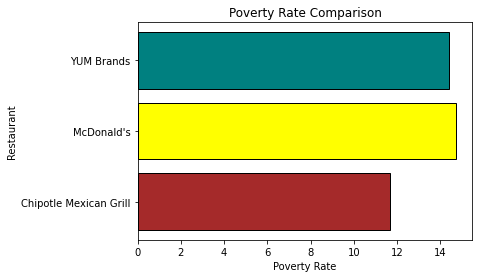

In [40]:
#Create List for Names and Mean values
Names = ["Chipotle Mexican Grill","McDonald's","YUM Brands"]
PR_mean = [11.655917,14.744467,14.383936]
bars = (Names)
y_pos = np.arange(len(bars))
#Add border for bars and colors for each individual bar
plt.barh(y_pos, PR_mean, color=['brown', 'yellow', 'teal'],edgecolor='black')
plt.title('Poverty Rate Comparison')
plt.xlabel('Poverty Rate')
plt.ylabel('Restaurant')
plt.yticks(y_pos, bars)
plt.show()


In [41]:
#Look for potential outliers
volume = []
CleanNPR.dropna()
#Start loop to locate outliers.
for place in Names:
    volume_list = CleanNPR.loc[CleanNPR["Name"]==place, "Poverty Rate"]
    
    volume.append(volume_list)
   
    quartiles = volume_list.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq 
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = volume_list.loc[(volume_list < lower_bound) | (volume_list > upper_bound)]
    
    print(f"Possible outlier for {place} is {outliers}")

Possible outlier for Chipotle Mexican Grill is 0       40.070994
1       38.192420
12      29.854278
28      33.780381
51      35.055250
          ...    
2590    39.986441
2591    29.024784
2593    30.300505
2605    38.889055
2609    29.753192
Name: Poverty Rate, Length: 128, dtype: float64
Possible outlier for McDonald's is 2636     36.862168
2649     50.146358
2650     45.838370
2777     63.494668
2820     36.201964
3696     38.565935
4314     38.771879
4315     38.771879
4319     40.427587
4329     37.025384
4393     37.454343
4394     37.454343
4445     43.988351
4446     43.988351
4470     35.261869
4598     47.560168
4603     35.195607
5946     43.429158
6209     35.482135
6223     35.409762
6224     35.409762
7125     44.805385
7391     39.063084
7392     39.063084
7394     39.063084
7639     51.318429
7647     46.433130
7648     46.433130
7776     35.261869
7839     34.992337
7902     39.396154
8066     36.050303
8133     36.862168
8916     39.173506
8918     35.274867
9042   

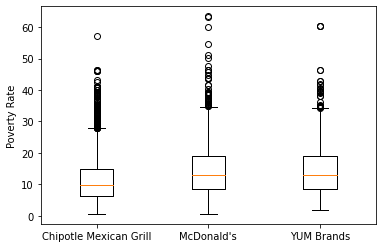

In [42]:
#Box plot to Display Outliers
plt.boxplot(volume, labels=Names)
plt.ylabel('Poverty Rate')
plt.show()